In [1]:
# Temel kütüphaneler
import pandas as pd
import numpy as np

# Görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarı mesajlarını azaltmak için
import warnings
warnings.filterwarnings("ignore")

# Grafik ayarları
plt.style.use("default")
sns.set(rc={"figure.figsize": (10, 5)})

# Pandas gösterim ayarları
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


In [2]:
DATA_PATH = "consumer_complaints.csv"

# DtypeWarning'i azaltmak için low_memory=False
df = pd.read_csv(DATA_PATH, low_memory=False)

# İlk satırlara bakış
df.head()


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [3]:
# Veri setinin boyutuna ve sütun isimlerine bakalım
print("Satır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

print("\nSütun isimleri:")
for col in df.columns:
    print("-", col)

Satır sayısı: 555957
Sütun sayısı: 18

Sütun isimleri:
- date_received
- product
- sub_product
- issue
- sub_issue
- consumer_complaint_narrative
- company_public_response
- company
- state
- zipcode
- tags
- consumer_consent_provided
- submitted_via
- date_sent_to_company
- company_response_to_consumer
- timely_response
- consumer_disputed?
- complaint_id


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

Hedef sütun: consumer_disputed?

Sınıf dağılımı (adet):
consumer_disputed?
No     443823
Yes    112134
Name: count, dtype: int64

Sınıf dağılımı (yüzde):
consumer_disputed?
No     79.83
Yes    20.17
Name: proportion, dtype: float64


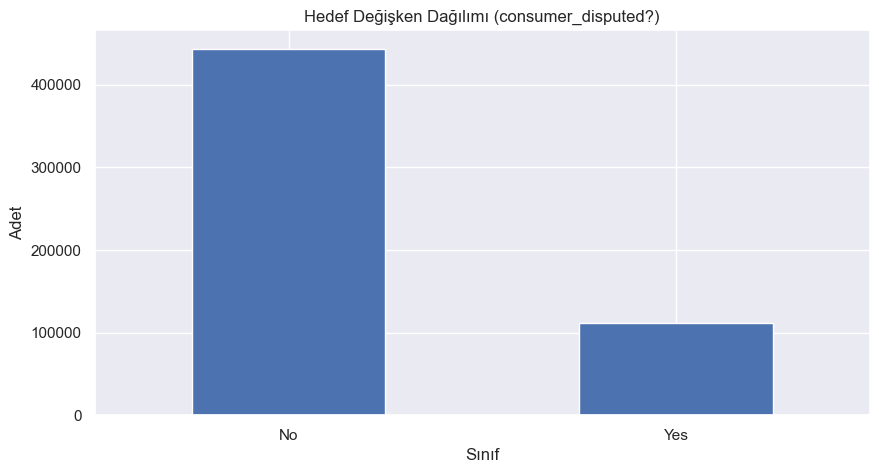

In [5]:
# Hedef sütun: consumer_disputed?
target_col = "consumer_disputed?"

print("Hedef sütun:", target_col)

print("\nSınıf dağılımı (adet):")
print(df[target_col].value_counts())

print("\nSınıf dağılımı (yüzde):")
print((df[target_col].value_counts(normalize=True) * 100).round(2))

# Basit bar grafiği
df[target_col].value_counts().plot(kind="bar")
plt.title("Hedef Değişken Dağılımı (consumer_disputed?)")
plt.xlabel("Sınıf")
plt.ylabel("Adet")
plt.xticks(rotation=0)
plt.show()


In [6]:
# Eksik değer sayıları
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Eksik değer sayıları (ilk 20):")
print(missing_counts.head(20))

Eksik değer sayıları (ilk 20):
consumer_complaint_narrative    489151
tags                            477998
company_public_response         470833
consumer_consent_provided       432499
sub_issue                       343335
sub_product                     158322
state                             4887
zipcode                           4505
date_sent_to_company                 0
consumer_disputed?                   0
timely_response                      0
company_response_to_consumer         0
date_received                        0
submitted_via                        0
product                              0
company                              0
issue                                0
complaint_id                         0
dtype: int64


In [7]:
# Eksik değer oranları (yüzde)
missing_ratio = (missing_counts / len(df) * 100).round(2)
print("Eksik değer oranları (ilk 20):")
print(missing_ratio.head(20))

Eksik değer oranları (ilk 20):
consumer_complaint_narrative    87.98
tags                            85.98
company_public_response         84.69
consumer_consent_provided       77.79
sub_issue                       61.76
sub_product                     28.48
state                            0.88
zipcode                          0.81
date_sent_to_company             0.00
consumer_disputed?               0.00
timely_response                  0.00
company_response_to_consumer     0.00
date_received                    0.00
submitted_via                    0.00
product                          0.00
company                          0.00
issue                            0.00
complaint_id                     0.00
dtype: float64


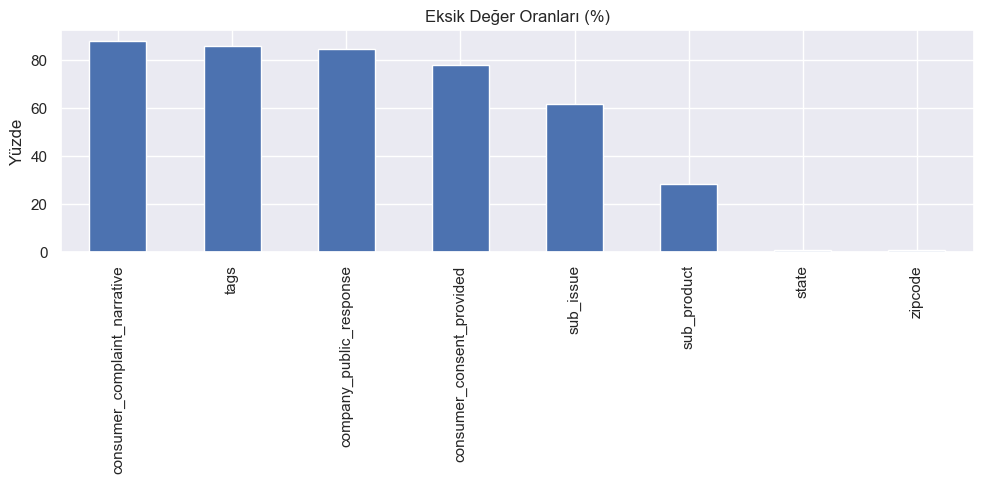

In [8]:
# Eksik değer oranlarını bar grafikte göstermek
missing_ratio[missing_ratio > 0].plot(kind="bar")
plt.title("Eksik Değer Oranları (%)")
plt.ylabel("Yüzde")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: count, dtype: int64


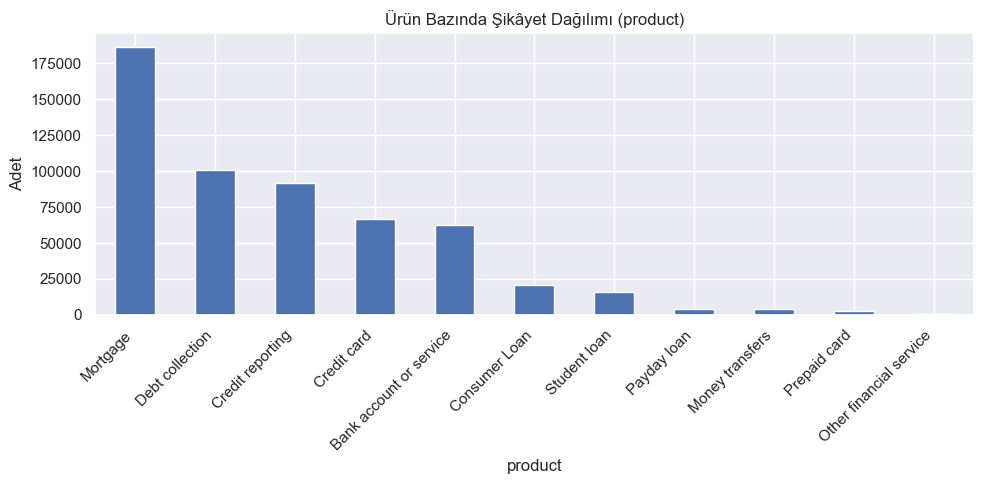

In [9]:
# En çok şikâyet gelen ilk ürünler
product_counts = df["product"].value_counts()

print(product_counts)

product_counts.plot(kind="bar")
plt.title("Ürün Bazında Şikâyet Dağılımı (product)")
plt.ylabel("Adet")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [10]:
# Şikâyet metni sütunu varsa uzunluk özellikleri üretelim

def count_chars(text):
    if isinstance(text, str):
        return len(text)
    return 0

def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

df["complaint_length_chars"] = df["consumer_complaint_narrative"].apply(count_chars)
df["complaint_length_words"] = df["consumer_complaint_narrative"].apply(count_words)

print(df[["complaint_length_chars", "complaint_length_words"]].describe())

       complaint_length_chars  complaint_length_words
count           555957.000000           555957.000000
mean               124.920940               22.908541
std                462.414115               84.776148
min                  0.000000                0.000000
25%                  0.000000                0.000000
50%                  0.000000                0.000000
75%                  0.000000                0.000000
max               5153.000000             1284.000000


In [11]:
# Tarih sütunlarından yanıt süresini hesaplayalım
df["date_received"] = pd.to_datetime(df["date_received"], errors="coerce")
df["date_sent_to_company"] = pd.to_datetime(df["date_sent_to_company"], errors="coerce")

df["response_days"] = (df["date_sent_to_company"] - df["date_received"]).dt.days

# Negatif değerleri 0'a çekelim (tarih hataları için)
df["response_days"] = df["response_days"].clip(lower=0)

print(df["response_days"].describe())


count    555957.000000
mean          4.670037
std          17.196469
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: response_days, dtype: float64


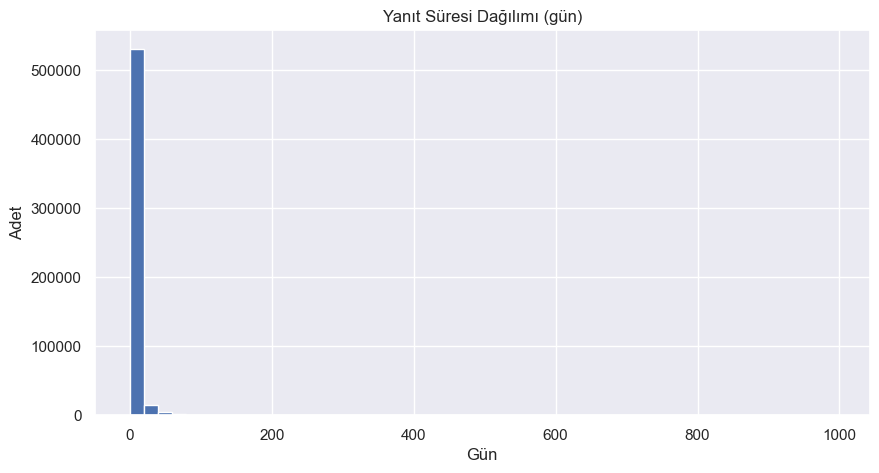

In [12]:
df["response_days"].hist(bins=50)
plt.title("Yanıt Süresi Dağılımı (gün)")
plt.xlabel("Gün")
plt.ylabel("Adet")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Yes -> 1, No -> 0
y = df[target_col].map({"Yes": 1, "No": 0})
print("Pozitif sınıf (1) oranı:", y.mean())

Pozitif sınıf (1) oranı: 0.20169545486431503


In [14]:
# Kullanmak istediğimiz temel sütunlar
base_features = [
    "product",
    "issue",
    "company_response_to_consumer",
    "timely_response",
    "complaint_length_words",
    "response_days",
]

# İhtiyaç duyduğumuz sütunların gerçekten var olduğundan emin olalım
available_features = [f for f in base_features if f in df.columns]
print("Kullanılabilir özellikler:", available_features)

X = df[available_features].copy()

Kullanılabilir özellikler: ['product', 'issue', 'company_response_to_consumer', 'timely_response', 'complaint_length_words', 'response_days']


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Kategorik ve sayısal sütun listeleri
categorical_cols = [
    "product",
    "issue",
    "company_response_to_consumer",
    "timely_response",
]

numeric_cols = [
    "complaint_length_words",
    "response_days",
]

print("Kategorik sütunlar:", categorical_cols)
print("Sayısal sütunlar:", numeric_cols)

# Sayısal: medyan ile doldur
numeric_transformer = SimpleImputer(strategy="median")

# Kategorik: en sık değer + OneHot
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Train / test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Eğitim kümesi boyutu:", X_train.shape)
print("Test kümesi boyutu:", X_test.shape)

Kategorik sütunlar: ['product', 'issue', 'company_response_to_consumer', 'timely_response']
Sayısal sütunlar: ['complaint_length_words', 'response_days']
Eğitim kümesi boyutu: (444765, 6)
Test kümesi boyutu: (111192, 6)


In [24]:
# Genişletilmiş feature set ile çalışıyoruz
extended_features = [
    "product",
    "sub_product",
    "issue",
    "sub_issue",
    "company_response_to_consumer",
    "timely_response",
    "submitted_via",
    "state",
    "complaint_length_words",
    "response_days",
]

X_ext = df[extended_features].copy()

categorical_cols_ext = [
    "product",
    "sub_product",
    "issue",
    "sub_issue",
    "company_response_to_consumer",
    "timely_response",
    "submitted_via",
    "state",
]

numeric_cols_ext = [
    "complaint_length_words",
    "response_days",
]

numeric_transformer_ext = SimpleImputer(strategy="median")
categorical_transformer_ext = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor_ext = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_ext, numeric_cols_ext),
        ("cat", categorical_transformer_ext, categorical_cols_ext),
    ]
)

X_ext_train, X_ext_test, y_ext_train, y_ext_test = train_test_split(
    X_ext, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Geniş feature set ile eğitim kümesi boyutu:", X_ext_train.shape)
print("Geniş feature set ile test kümesi boyutu:", X_ext_test.shape)


Geniş feature set ile eğitim kümesi boyutu: (444765, 10)
Geniş feature set ile test kümesi boyutu: (111192, 10)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Base model 1: Decision Tree (balanced, geniş feature set)
dt_model = Pipeline(
    steps=[
        ("preprocess", preprocessor_ext),
        ("model", DecisionTreeClassifier(
            max_depth=12,
            min_samples_leaf=100,
            class_weight="balanced",
            random_state=42
        ))
    ]
)

dt_model.fit(X_ext_train, y_ext_train)
y_pred_dt = dt_model.predict(X_ext_test)
y_proba_dt = dt_model.predict_proba(X_ext_test)[:, 1]

print("=== Decision Tree (balanced, geniş feature set) ===")
print("Accuracy:", accuracy_score(y_ext_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_ext_test, y_proba_dt))
print(classification_report(y_ext_test, y_pred_dt, digits=4))


=== Decision Tree (balanced, geniş feature set) ===
Accuracy: 0.5576660191380675
ROC AUC: 0.6253402577052718
              precision    recall  f1-score   support

           0     0.8564    0.5358    0.6591     88765
           1     0.2596    0.6444    0.3701     22427

    accuracy                         0.5577    111192
   macro avg     0.5580    0.5901    0.5146    111192
weighted avg     0.7360    0.5577    0.6009    111192



In [26]:
# Base model 2: Logistic Regression (balanced, geniş feature set)
lr_model = Pipeline(
    steps=[
        ("preprocess", preprocessor_ext),
        ("model", LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
            n_jobs=-1
        ))
    ]
)

lr_model.fit(X_ext_train, y_ext_train)
y_pred_lr_ext = lr_model.predict(X_ext_test)
y_proba_lr_ext = lr_model.predict_proba(X_ext_test)[:, 1]

print("=== Logistic Regression (balanced, geniş feature set) ===")
print("Accuracy:", accuracy_score(y_ext_test, y_pred_lr_ext))
print("ROC AUC:", roc_auc_score(y_ext_test, y_proba_lr_ext))
print(classification_report(y_ext_test, y_pred_lr_ext, digits=4))


=== Logistic Regression (balanced, geniş feature set) ===
Accuracy: 0.5567127131448306
ROC AUC: 0.6239876258020192
              precision    recall  f1-score   support

           0     0.8548    0.5357    0.6586     88765
           1     0.2583    0.6400    0.3680     22427

    accuracy                         0.5567    111192
   macro avg     0.5566    0.5878    0.5133    111192
weighted avg     0.7345    0.5567    0.6000    111192



In [28]:
from sklearn.feature_selection import SelectFromModel

# Gömülü feature selection için temel karar ağacı
fs_base_tree = DecisionTreeClassifier(
    max_depth=12,
    min_samples_leaf=100,
    class_weight="balanced",
    random_state=42
)

dt_fs_model = Pipeline(
    steps=[
        ("preprocess", preprocessor_ext),
        ("feature_select", SelectFromModel(fs_base_tree, threshold="median")),
        ("model", DecisionTreeClassifier(
            max_depth=12,
            min_samples_leaf=100,
            class_weight="balanced",
            random_state=42
        ))
    ]
)

dt_fs_model.fit(X_ext_train, y_ext_train)
y_pred_dt_fs = dt_fs_model.predict(X_ext_test)
y_proba_dt_fs = dt_fs_model.predict_proba(X_ext_test)[:, 1]

print("=== Decision Tree + Tree-based Feature Selection ===")
print("Accuracy:", accuracy_score(y_ext_test, y_pred_dt_fs))
print("ROC AUC:", roc_auc_score(y_ext_test, y_proba_dt_fs))
print(classification_report(y_ext_test, y_pred_dt_fs, digits=4))


=== Decision Tree + Tree-based Feature Selection ===
Accuracy: 0.5576660191380675
ROC AUC: 0.6253402577052718
              precision    recall  f1-score   support

           0     0.8564    0.5358    0.6591     88765
           1     0.2596    0.6444    0.3701     22427

    accuracy                         0.5577    111192
   macro avg     0.5580    0.5901    0.5146    111192
weighted avg     0.7360    0.5577    0.6009    111192



In [30]:
results_ext = []

def add_row_ext(name, y_true, y_pred, y_proba):
    results_ext.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba),
        "Recall (Yes)": recall_score(y_true, y_pred, pos_label=1)
    })

add_row_ext("Decision Tree (balanced, full extended)", y_ext_test, y_pred_dt, y_proba_dt)
add_row_ext("Decision Tree (balanced, FS)", y_ext_test, y_pred_dt_fs, y_proba_dt_fs)
add_row_ext("Logistic Regression (balanced, full extended)", y_ext_test, y_pred_lr_ext, y_proba_lr_ext)

pd.DataFrame(results_ext)


,Model,Accuracy,ROC AUC,Recall (Yes)
0,"Decision Tree (balanced, full extended)",0.557666,0.625340,0.644357
1,"Decision Tree (balanced, FS)",0.557666,0.625340,0.644357
2,"Logistic Regression (balanced, full extended)",0.556713,0.623988,0.639988
